<a href="https://colab.research.google.com/github/Sahaswari/Image-Classification/blob/main/Image_Classification.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import tensorflow as tf
from tensorflow.keras import datasets, layers, models
import matplotlib.pyplot as plt
import numpy as np

In [2]:
(x_train, y_train), (x_test, y_test) = datasets.cifar10.load_data()
x_train.shape

170498071/170498071 [==============================] - 2s 0us/step


(50000, 32, 32, 3)

In [3]:
x_test.shape

(10000, 32, 32, 3)

In [5]:
y_train[:5]

array([[6],
       [9],
       [9],
       [4],
       [1]], dtype=uint8)

In [10]:
y_train = y_train.reshape(-1)
y_train[:5]

array([6, 9, 9, 4, 1], dtype=uint8)

In [6]:
classes = ["airplane", "automobile" , "bird", "cat", "deer", "dog", "frog", "horse", "ship", "truck"]

In [11]:
classes[9]

'truck'

In [35]:
x_train[1]

array([[[0.60392157, 0.69411765, 0.73333333],
        [0.49411765, 0.5372549 , 0.53333333],
        [0.41176471, 0.40784314, 0.37254902],
        ...,
        [0.35686275, 0.37254902, 0.27843137],
        [0.34117647, 0.35294118, 0.27843137],
        [0.30980392, 0.31764706, 0.2745098 ]],

       [[0.54901961, 0.62745098, 0.6627451 ],
        [0.56862745, 0.6       , 0.60392157],
        [0.49019608, 0.49019608, 0.4627451 ],
        ...,
        [0.37647059, 0.38823529, 0.30588235],
        [0.30196078, 0.31372549, 0.24313725],
        [0.27843137, 0.28627451, 0.23921569]],

       [[0.54901961, 0.60784314, 0.64313725],
        [0.54509804, 0.57254902, 0.58431373],
        [0.45098039, 0.45098039, 0.43921569],
        ...,
        [0.30980392, 0.32156863, 0.25098039],
        [0.26666667, 0.2745098 , 0.21568627],
        [0.2627451 , 0.27058824, 0.21568627]],

       ...,

       [[0.68627451, 0.65490196, 0.65098039],
        [0.61176471, 0.60392157, 0.62745098],
        [0.60392157, 0

In [12]:
def plot_sample(x, y, index):
  plt.figure(figsize=(15,2))
  plt.imshow(x[index])
  plt.xlabel(classes[y[index]])

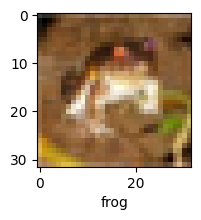

In [13]:
plot_sample(x_train, y_train,0)

array([[[ 59,  62,  63],
        [ 43,  46,  45],
        [ 50,  48,  43],
        ...,
        [158, 132, 108],
        [152, 125, 102],
        [148, 124, 103]],

       [[ 16,  20,  20],
        [  0,   0,   0],
        [ 18,   8,   0],
        ...,
        [123,  88,  55],
        [119,  83,  50],
        [122,  87,  57]],

       [[ 25,  24,  21],
        [ 16,   7,   0],
        [ 49,  27,   8],
        ...,
        [118,  84,  50],
        [120,  84,  50],
        [109,  73,  42]],

       ...,

       [[208, 170,  96],
        [201, 153,  34],
        [198, 161,  26],
        ...,
        [160, 133,  70],
        [ 56,  31,   7],
        [ 53,  34,  20]],

       [[180, 139,  96],
        [173, 123,  42],
        [186, 144,  30],
        ...,
        [184, 148,  94],
        [ 97,  62,  34],
        [ 83,  53,  34]],

       [[177, 144, 116],
        [168, 129,  94],
        [179, 142,  87],
        ...,
        [216, 184, 140],
        [151, 118,  84],
        [123,  92,  72]]], dtype=uint8)
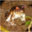

In [14]:
x_train[0]


In [15]:
x_train[0]/255

array([[[0.23137255, 0.24313725, 0.24705882],
        [0.16862745, 0.18039216, 0.17647059],
        [0.19607843, 0.18823529, 0.16862745],
        ...,
        [0.61960784, 0.51764706, 0.42352941],
        [0.59607843, 0.49019608, 0.4       ],
        [0.58039216, 0.48627451, 0.40392157]],

       [[0.0627451 , 0.07843137, 0.07843137],
        [0.        , 0.        , 0.        ],
        [0.07058824, 0.03137255, 0.        ],
        ...,
        [0.48235294, 0.34509804, 0.21568627],
        [0.46666667, 0.3254902 , 0.19607843],
        [0.47843137, 0.34117647, 0.22352941]],

       [[0.09803922, 0.09411765, 0.08235294],
        [0.0627451 , 0.02745098, 0.        ],
        [0.19215686, 0.10588235, 0.03137255],
        ...,
        [0.4627451 , 0.32941176, 0.19607843],
        [0.47058824, 0.32941176, 0.19607843],
        [0.42745098, 0.28627451, 0.16470588]],

       ...,

       [[0.81568627, 0.66666667, 0.37647059],
        [0.78823529, 0.6       , 0.13333333],
        [0.77647059, 0

In [16]:
#Normalization
x_train = x_train/255
x_test = x_test/255

In [18]:
ann = models.Sequential([
    layers.Flatten(input_shape=(32,32,3)),
    layers.Dense(3000,activation='relu'),
    layers.Dense(1000, activation='relu'),
    layers.Dense(10, activation='sigmoid')
])

ann.compile(optimizer='SGD',
            loss ='sparse_categorical_crossentropy',
            metrics = ['accuracy'])

ann.fit(x_train, y_train, epochs = 5)

Epoch 1/5
1563/1563 [==============================] - 145s 93ms/step - loss: 1.8096 - accuracy: 0.3552
Epoch 2/5
1563/1563 [==============================] - 133s 85ms/step - loss: 1.6223 - accuracy: 0.4276
Epoch 3/5
1563/1563 [==============================] - 136s 87ms/step - loss: 1.5388 - accuracy: 0.4584
Epoch 4/5
1563/1563 [==============================] - 136s 87ms/step - loss: 1.4803 - accuracy: 0.4789
Epoch 5/5
1563/1563 [==============================] - 142s 91ms/step - loss: 1.4307 - accuracy: 0.4952


In [19]:
ann.evaluate(x_test, y_test)

313/313 [==============================] - 16s 51ms/step - loss: 1.4798 - accuracy: 0.4704


[1.47975492477417, 0.47040000557899475]

In [20]:
from sklearn.metrics import confusion_matrix, classification_report
import numpy as np
y_pred = ann.predict(x_test)
y_pred_classes = [np.argmax(element) for element in y_pred]

print("Classification Report : \n", classification_report(y_test, y_pred_classes))

313/313 [==============================] - 10s 31ms/step
Classification Report : 
               precision    recall  f1-score   support

           0       0.44      0.59      0.50      1000
           1       0.48      0.75      0.59      1000
           2       0.35      0.36      0.36      1000
           3       0.42      0.17      0.25      1000
           4       0.56      0.20      0.30      1000
           5       0.41      0.39      0.40      1000
           6       0.45      0.68      0.54      1000
           7       0.68      0.43      0.53      1000
           8       0.49      0.71      0.58      1000
           9       0.57      0.41      0.47      1000

    accuracy                           0.47     10000
   macro avg       0.48      0.47      0.45     10000
weighted avg       0.48      0.47      0.45     10000



In [22]:
cnn = models.Sequential([
    #cnn
    layers.Conv2D(filters=32, kernel_size=(3,3), activation='relu', input_shape=(32,32,3)),
    layers.MaxPooling2D((2,2)),

    layers.Conv2D(filters =64, kernel_size=(3,3), activation='relu'),
    layers.MaxPooling2D((2,2)),

    #dense
    layers.Flatten(),
    layers.Dense(64, activation ='relu'),
    layers.Dense(10, activation ='softmax')
])

In [24]:
cnn.compile(optimizer='adam',
            loss = 'sparse_categorical_crossentropy',
            metrics = ['accuracy'])

In [25]:
cnn.fit(x_train, y_train, epochs=10)

Epoch 1/10
1563/1563 [==============================] - 103s 64ms/step - loss: 1.4616 - accuracy: 0.4763
Epoch 2/10
1563/1563 [==============================] - 101s 64ms/step - loss: 1.1045 - accuracy: 0.6118
Epoch 3/10
1563/1563 [==============================] - 101s 65ms/step - loss: 0.9847 - accuracy: 0.6584
Epoch 4/10
1563/1563 [==============================] - 100s 64ms/step - loss: 0.9085 - accuracy: 0.6865
Epoch 5/10
1563/1563 [==============================] - 102s 65ms/step - loss: 0.8461 - accuracy: 0.7071
Epoch 6/10
1563/1563 [==============================] - 85s 55ms/step - loss: 0.7986 - accuracy: 0.7238
Epoch 7/10
1563/1563 [==============================] - 65s 42ms/step - loss: 0.7581 - accuracy: 0.7348
Epoch 8/10
1563/1563 [==============================] - 61s 39ms/step - loss: 0.7181 - accuracy: 0.7505
Epoch 9/10
1563/1563 [==============================] - 60s 38ms/step - loss: 0.6868 - accuracy: 0.7593
Epoch 10/10
1563/1563 [==============================] - 62

In [26]:
cnn.evaluate(x_test, y_test)

313/313 [==============================] - 5s 15ms/step - loss: 0.9103 - accuracy: 0.7019


[0.9102889895439148, 0.7019000053405762]

In [38]:
y_test = y_test.reshape(-1,)
y_test[:5]

array([3, 8, 8, 0, 6], dtype=uint8)

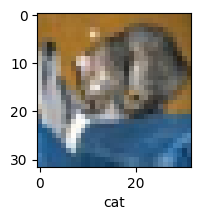

In [39]:
plot_sample(x_test, y_test,0)

In [40]:
y_pred = cnn.predict(x_test)
y_pred[:5]

313/313 [==============================] - 4s 11ms/step


array([[2.57279794e-03, 3.25322544e-05, 8.84638075e-03, 7.47609556e-01,
        8.39590561e-04, 8.63441750e-02, 3.05752549e-02, 2.36170206e-04,
        1.14777558e-01, 8.16603657e-03],
       [9.85726598e-04, 5.97413222e-04, 1.08805389e-05, 1.47978271e-05,
        7.58723445e-07, 1.16254625e-07, 3.19468292e-08, 2.08731947e-07,
        9.98001754e-01, 3.88331042e-04],
       [7.86562562e-02, 7.72527307e-02, 2.27521779e-03, 1.42905058e-03,
        1.07337073e-04, 8.39312270e-05, 7.33840134e-05, 2.97089755e-05,
        8.36773217e-01, 3.31924832e-03],
       [7.08059907e-01, 4.87647281e-04, 7.53020961e-03, 1.07297348e-03,
        1.68776896e-03, 1.77766597e-05, 1.48310239e-04, 3.34413708e-05,
        2.80803025e-01, 1.58918774e-04],
       [2.11639463e-06, 5.93259872e-04, 1.18778842e-02, 5.88858500e-03,
        1.35963649e-01, 5.08753292e-04, 8.44969392e-01, 6.83177575e-07,
        1.93561180e-04, 2.29814646e-06]], dtype=float32)

In [41]:
y_classes = [np.argmax(element) for element in y_pred]
y_classes[:5]

[3, 8, 8, 0, 6]

In [42]:
y_test[:5]

array([3, 8, 8, 0, 6], dtype=uint8)

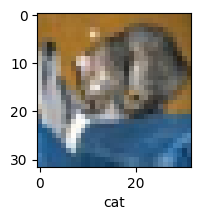

In [45]:
plot_sample(x_test, y_test, 0)

In [44]:
classes[y_classes[0]]

'cat'

In [46]:
print("classification Report:\n", classification_report(y_test, y_classes))

classification Report:
               precision    recall  f1-score   support

           0       0.74      0.74      0.74      1000
           1       0.89      0.77      0.82      1000
           2       0.55      0.65      0.60      1000
           3       0.58      0.43      0.49      1000
           4       0.61      0.69      0.64      1000
           5       0.65      0.59      0.62      1000
           6       0.80      0.74      0.77      1000
           7       0.76      0.75      0.75      1000
           8       0.75      0.84      0.79      1000
           9       0.73      0.83      0.77      1000

    accuracy                           0.70     10000
   macro avg       0.70      0.70      0.70     10000
weighted avg       0.70      0.70      0.70     10000

